# **Lecture: K Nearest Neighbor (KNN)**

---
##### **4 Major Steps of Machine Learning:**
> 1. Data collection, preperation and general analysis. 
> 2. Algorithm design.
> 3. Evaluation of preformance.
> 4. Deployment.

In this notebook we will look at each of these steps as we orbit the method of K Nearest Neighbor. 

---

## **Step 1.1: Read in the training data.**

In [1]:
import numpy as np # Numpy
from numpy import genfromtxt # Needed to read in CSV
import matplotlib.pyplot as plt # Needed to plot

In [2]:
Raw_Data = genfromtxt('/home/adam_forland/Files/Data/iris_KNN.csv', delimiter=',')
Raw_Data = Raw_Data[1:,:]
Raw_Data = np.random.permutation(Raw_Data) # Randomize the data so that it is not sorted. (Data came sorted)

Let's start by printing some info about the data.  
The six columns are:
1. Index.
2. sepal length in cm 
3. sepal width in cm 
4. petal length in cm 
5. petal width in cm
6. Class: 
    - Iris Setosa, 0
    - Iris Versicolour, 1 
    - Iris Virginica, 2  
    
Here is a printout of a small part of the data.

In [4]:
print(np.shape(Raw_Data)) # Check the shape of all the data.
print(Raw_Data[40:60,:]) # Print a part of the data (40 to 59). Note that they are permuted.

(149, 6)
[[1.34e+02 7.70e+00 3.00e+00 6.10e+00 2.30e+00 2.00e+00]
 [1.28e+02 7.20e+00 3.00e+00 5.80e+00 1.60e+00 2.00e+00]
 [5.10e+01 6.90e+00 3.10e+00 4.90e+00 1.50e+00 1.00e+00]
 [3.90e+01 5.00e+00 3.50e+00 1.30e+00 3.00e-01 0.00e+00]
 [8.10e+01 5.80e+00 2.70e+00 3.90e+00 1.20e+00 1.00e+00]
 [1.30e+01 5.80e+00 4.00e+00 1.20e+00 2.00e-01 0.00e+00]
 [5.90e+01 5.00e+00 2.00e+00 3.50e+00 1.00e+00 1.00e+00]
 [3.30e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01 0.00e+00]
 [7.50e+01 6.80e+00 2.80e+00 4.80e+00 1.40e+00 1.00e+00]
 [4.80e+01 5.00e+00 3.30e+00 1.40e+00 2.00e-01 0.00e+00]
 [9.00e+01 6.10e+00 3.00e+00 4.60e+00 1.40e+00 1.00e+00]
 [1.00e+00 4.70e+00 3.20e+00 1.30e+00 2.00e-01 0.00e+00]
 [1.12e+02 5.70e+00 2.50e+00 5.00e+00 2.00e+00 2.00e+00]
 [2.20e+01 5.10e+00 3.30e+00 1.70e+00 5.00e-01 0.00e+00]
 [1.46e+02 6.50e+00 3.00e+00 5.20e+00 2.00e+00 2.00e+00]
 [1.27e+02 6.40e+00 2.80e+00 5.60e+00 2.10e+00 2.00e+00]
 [1.03e+02 6.50e+00 3.00e+00 5.80e+00 2.20e+00 2.00e+00]
 [8.40e+01 6.00e+00 3.

Above we can see that there are 6 columns and 149 rows. In the columns we can see the index, 4 features and the target number.

---
## **Step 1.2: Training and Testing Data**

Next we are going to split the data into **training** and **testing**. The testing data here will not be in the clustering below and will allow us to test our value for k.

In [5]:
Num_Test = 10 # This sets how many of the datum will be set aside for testing.

# Features to cluster by.
# 0 sepal length in cm
# 1 sepal width in cm
# 2 petal length in cm
# 3 petal width in cm

# Please make sure feature_1 < feature_2

# Set the feature values
feature_1 = 1 
feature_2 = 2

Train = Raw_Data[0:(149 - Num_Test),:] # Assign the testing set. 
Test = Raw_Data[(149 - Num_Test):,:] # Assign the training set.

# Print the shape of each to see that they are correct.
print(np.shape(Train)) 
print(np.shape(Test))

(139, 6)
(10, 6)


In the next cell we will take a quick look at each of the features. In this example we are going to look at the mean, but we could do more analysis here to see what else we can learn from the data before we start to allow the machine to look at it.

## **Step 1.3: Data analysis**

In [6]:
# Each of these finds the mean of a column. Note that we are indexing through all the rows, 
# but switching the column.
SL_Mean = np.mean(Raw_Data[:,1])
SW_Mean = np.mean(Raw_Data[:,2])
PL_Mean = np.mean(Raw_Data[:,3])
PW_Mean = np.mean(Raw_Data[:,4])
print(SL_Mean, SW_Mean, PL_Mean, PW_Mean) # Print the results.

5.848322147651007 3.051006711409396 3.774496644295302 1.2053691275167784


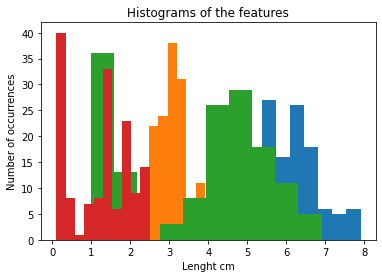

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = range(np.shape(Raw_Data[:,1])[0])

plt.hist(Raw_Data[:,1])
plt.hist(Raw_Data[:,2])
plt.hist(Raw_Data[:,3])
plt.hist(Raw_Data[:,4])

plt.title('Histograms of the features')
ax.set_xlabel('Lenght cm')
ax.set_ylabel('Number of occurrences')

plt.show()

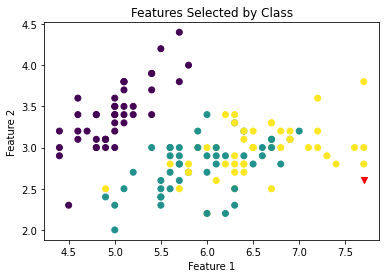

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot all the training data for the features selected.
plt.scatter(Train[:,feature_1], Train[:,feature_2], c = Train[:,5], marker = 'o' )

# Uncomment the next line to see all the training data.
#plt.scatter(Test[:,feature_1], Test[:,feature_2], c = 'gray')

# Plot the training value that we are looking at (Hard coded as test value 3)
plt.scatter(Test[4,feature_1], Test[4,feature_2], c = 'r', marker='v')

plt.title('Features Selected by Class')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

plt.show()

---
## **Step 2: K-Nearest Neighbor**

## **K Nearest Neighbor algorithm:**  

* Step 1: Read in the training data.
* Step 2: Read in the new point.
* Step 3: Compute the Euclidian distance to all points.
* Step 4: Use training to determine the best k-value.

### **One Datum**

This first cell will run the KNN process for just one datum. This gives us the tool that we will need to predict with using the training data, but there is no method to loop over more than one datum. 

In [9]:
k = 5 # Setting the k value for the size of the collected distances.
distances = [] # Make an empty list for collecting the distances.

# This loop will find all the distances between point 3 and all other training points.
for i in range(np.shape(Train)[0]):
    
    # Euclidean distance (other measures could go here).
    dist = np.linalg.norm(Test[3,feature_1:feature_2 + 1] - Train[i,feature_1:feature_2 + 1])
    
    distances.append(dist) # Append to the distance list.
    
distances = np.array(distances) # Make the list into an array.

# argsort will sort our array from smallest to largest and tell us the index. [:k] will get us the first k indices from the list (k smallest). 
# Train[] will allow us to assign the individual datum for the k nearest neighbors. 
k_neighbors = Train[distances.argsort()[:k]]  

print(k_neighbors)

[[ 1.   4.7  3.2  1.3  0.2  0. ]
 [46.   4.6  3.2  1.4  0.2  0. ]
 [29.   4.8  3.1  1.6  0.2  0. ]
 [ 2.   4.6  3.1  1.5  0.2  0. ]
 [23.   4.8  3.4  1.9  0.2  0. ]]


### **All the Testing Data**

Now we can build the structure to loop over all the data. We will use the same code that we have above, but instead of only checking one point, we will use a for loop to loop over all the points in the testing array. 

This cell also makes a visualization for each of the testing datum.

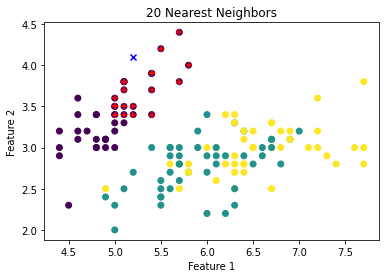

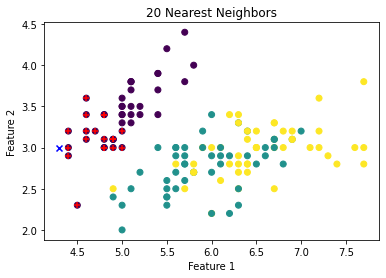

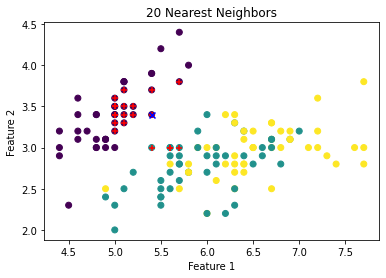

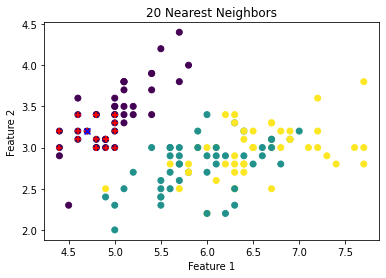

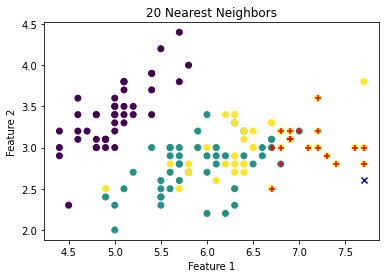

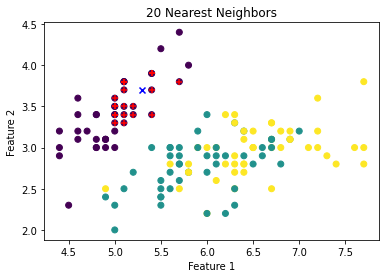

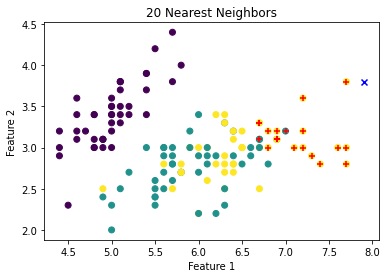

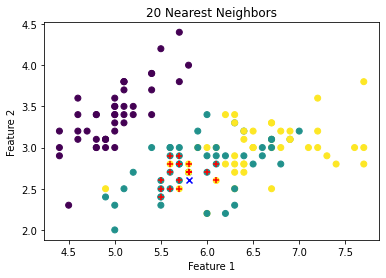

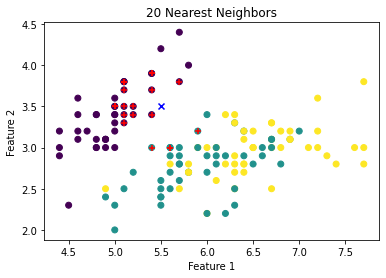

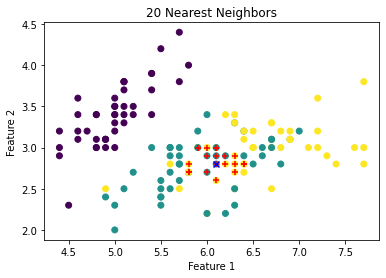

In [10]:
k = 20 # Setting the k value for the size of the assessed distances.

for t in range(np.shape(Test)[0]):
    distances = [] # Make an empty list for collecting the distances.
    
    
    # This loop will find all the distances between point and all other training points.
    for i in range(0,np.shape(Train)[0]):
        dist = np.linalg.norm(Test[t, (feature_1,feature_2)] - Train[i, (feature_1,feature_2)]) # Euclidean distance (other measures could go here).
        distances.append(dist) # Append to the distance list.
    
    distances = np.array(distances) # Make the list into an array.

    # argsort will sort our array from smallest to largest and tell us the index. [:k] 
    # will get us the first k indices from the list (k shortest distances). 
    # Train[] will allow us to assign the individual datum for the k nearest neighbors. 
    k_neighbors = Train[distances.argsort()][:k]  
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot the different features with respect to eachother as well as the nearest neighbors.
    plt.scatter(Train[:,feature_1], Train[:,feature_2], c = Train[:,5], marker='o')
    plt.scatter(k_neighbors[:,feature_1], k_neighbors[:,feature_2], c = 'r', marker = '+')
    plt.scatter(Test[t,feature_1], Test[t,feature_2], c = 'b', marker = 'x')

    # Tiles and labels
    plt.title(str(k) + ' Nearest Neighbors') 
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    plt.show()

This next cell is the main code of the algorithm. The piece of code has a few different tasks. 
> - Find the K Nearest Neighbors for each test datum.
> - Cycle through different values of k. Start at k = 1 and run till k hits the data size.
> - Compute the error for each value of k. 
> - Plot the error to determine the value for k that seems to work best.

In [11]:
error = [] # Make an empty list to collect the errors.
sum_error = []

# loop to loop over all the possible values for k.
for n in range(1, np.shape(Raw_Data)[0]):
    sum_error_val = 0
    k = n # Set the k value to the index for the outside loop.
    guess = [] # Reset the guess list.
    
    # Loop to loop over all the testing data.
    for j in range(np.shape(Test)[0]):
        distances_loop = [] # Make an empty list for the distances.
    
        # Loop over all the training data.
        for i in range(np.shape(Train)[0]):
            dist_loop = np.linalg.norm(Test[j,3:5] - Train[i,3:5])
            distances_loop.append(dist_loop)

        # argsort will sort our array from smallest to largest and tell us the index. [:k] will get us the first k indices from the list (k smallest). 
        # Train[] will allow us to assign the individual datum for the k nearest neighbors. 
        distances_loop = np.array(distances_loop)
        k_neighbors_loop = Train[distances_loop.argsort()[:k]]
        
        # This will count the class type for all the neighbors. (.astype(int) is to set the float to an int)
        bins = np.bincount(k_neighbors_loop[:,5].astype(int))
    
        # Appends the maximum value to the guess list for each datum.
        guess.append(bins.argsort()[-1])
    
        if bins.argsort()[-1] != Test[j,5]:
            sum_error_val += 1
        else:
            sum_error_val += 0
        
    # Collects all the errors (wrong class).
    sum_error.append(sum_error_val)

# Loop over all the error vectors in the error list
for r in range(np.shape(error)[0]):
    sum_error.append(np.sum(np.abs(error)[r])) # Count the number of wrong answers.

## **Step 3: Evaluate the Results**

In [12]:
print(sum_error)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


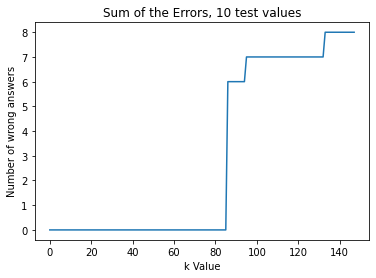

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(range(len(sum_error)), sum_error)

plt.title('Sum of the Errors, ' + str(Num_Test) + ' test values') 
ax.set_xlabel('k Value')
ax.set_ylabel('Number of wrong answers')
plt.show()

---
## **Step 4: Deploy the Tool**

The fifth and final step is to make a tool based on the training that we have done. In this case the "training" is the k value that we learned works best. At this point we will write the method into a definition. This will allow us to send it features and it will report classifications. 

In [14]:
def KNN(x, k):
# Loop over all the training data.
    distances_loop = [] # Make an empty list for the distances.
    
    # Distance to all the training points.
    for i in range(np.shape(Train)[0]):
        dist_loop = np.linalg.norm(x - Train[i,3:5])
        distances_loop.append(dist_loop)
    
    # Make the collected distances into an array.
    distances_loop = np.array(distances_loop)
    k_neighbors_loop = Train[distances_loop.argsort()[:k]] # Take the k smallest distances.
        
    # This will count the class type for all the neighbors. (.astype(int) is to set the float to an int)
    bins = np.bincount(k_neighbors_loop[:,5].astype(int))
    
    # Appends the maximum value to the guess list for each datum.
    return bins.argsort()[-1]

In [15]:
## This is our "UI/UX". This will give us a readout for the flower that we are checking.
print("Welcome to Iris Classifier v0")
f1 = input("Enter sepal length in cm:")
f2 = input("Enter sepal width in cm:")

x = np.array([float(f1),float(f2)])

Itype = KNN(x, 40)
if Itype == 0:
    print("You have a Iris Setosa")
elif Itype == 1:
    print("You have a Iris Versicolour")
else:
    print("You have a Iris Virginica")

Welcome to Iris Classifier v0


KeyboardInterrupt: Interrupted by user